* **bold text** The MNIST data is a database of handwritten digits from 0 to 9.
* The database contains **60,000** **28x28** grayscale images of the **10 digits**, along with a test set of **10,000 images**

In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pydot

In [ ]:
import tensorflow as tf
from tensorflow import keras

**1. Load the database to variable named digit_mnist using the Keras inbuilt datasets (digit_mnist = keras.datasets.mnist)**

In [ ]:
digit_mnist = keras.datasets.mnist

**2. Import data to create X_train_full, y_train_full, X_test and y_test variables**

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = digit_mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
# plt.imshow(X_train_full[17])

In [ ]:
# y_train_full[17]

**3. Normalize the data**

In [ ]:
# Normalisation
X_train_n = X_train_full / 255.0
X_test_n = X_test / 255.0

**4. Create a validation set of 6000 images**

In [ ]:
# Split into Train, Test
X_valid, X_train = X_train_n[:6000], X_train_n[6000:] # :6000 - 0 to 6000 | AND | 6000: - 6001 to 600000
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
X_test = X_test_n

**5. Create an ANN model with two dense layers of 200 and 100 neurons**

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28])) # ip layer / Flatten for 2D 28X28 px into 784 px in 1D array
model.add(keras.layers.Dense(200, activation="relu")) # Hidden Layer 1
model.add(keras.layers.Dense(100, activation="relu")) # Hidden Layer 2
model.add(keras.layers.Dense(10, activation="softmax")) # Output Layer

# relu: =0 for -ve ips, =ip for +ve ips
# softmax: creates sum of all class probablity to =1

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 100)               20100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 178,110
Trainable params: 178,110
Non-trainable params: 0
_________________________________________________________________


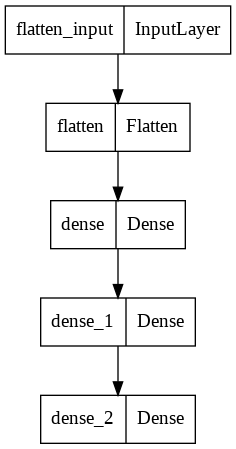

In [ ]:
keras.utils.plot_model(model)

**6. Compile and train the model for 60 epochs**

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [ ]:
model_history = model.fit(X_train, y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.6327 - accuracy: 0.8349 - val_loss: 0.3160 - val_accuracy: 0.9130
Epoch 2/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.2952 - accuracy: 0.9166 - val_loss: 0.2523 - val_accuracy: 0.9297
Epoch 3/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2431 - accuracy: 0.9308 - val_loss: 0.2089 - val_accuracy: 0.9412
Epoch 4/60
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2092 - accuracy: 0.9403 - val_loss: 0.1861 - val_accuracy: 0.9497
Epoch 5/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1844 - accuracy: 0.9482 - val_loss: 0.1691 - val_accuracy: 0.9542
Epoch 6/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1643 - accuracy: 0.9534 - val_loss: 0.1494 - val_accuracy: 0.9583
Epoch 7/60
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1482 - accuracy: 0.9579 - val_loss: 0.1395 - val_accuracy:

**7. Plot the loss and accuracy against epoch**

In [ ]:
model_history.history

{'accuracy': [0.8349074125289917,
  0.9165740609169006,
  0.9307777881622314,
  0.9402777552604675,
  0.9482407569885254,
  0.9533888697624207,
  0.9579444527626038,
  0.961814820766449,
  0.9650370478630066,
  0.9676111340522766,
  0.9697962999343872,
  0.9727036952972412,
  0.9743703603744507,
  0.9761852025985718,
  0.9783148169517517,
  0.9793518781661987,
  0.9807037115097046,
  0.9823518395423889,
  0.9828703999519348,
  0.9844074249267578,
  0.9850184917449951,
  0.9861481189727783,
  0.9867963194847107,
  0.9877036809921265,
  0.9885185360908508,
  0.9892963171005249,
  0.9900185465812683,
  0.991018533706665,
  0.9910926222801208,
  0.9918333292007446,
  0.9921296238899231,
  0.9930185079574585,
  0.9935926198959351,
  0.9939444661140442,
  0.9942407608032227,
  0.9949259161949158,
  0.9954814910888672,
  0.9957036972045898,
  0.9962407350540161,
  0.9964444637298584,
  0.9967963099479675,
  0.9969074130058289,
  0.9972407221794128,
  0.9973888993263245,
  0.9977407455444336,


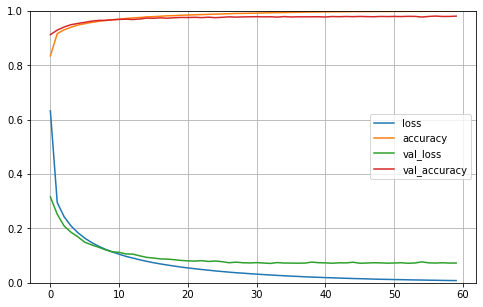

In [ ]:
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1) # Y axis between 0 and 1
plt.show()

**8. Evaluate the model accuracy on the test dataset**

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0746 - accuracy: 0.9791


[0.07463058829307556, 0.9790999889373779]

**9. Predict the digit for the first 5 records of the test dataset**

In [ ]:
X_new = X_test[:5]

In [ ]:
y_proba = model.predict(X_new) # Predict in probablity
y_proba.round(2) #

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
#y_pred = model.predict_classes(X_new) # Predict in classes
y_pred=np.argmax(model.predict(X_new),axis=1)
y_pred

array([7, 2, 1, 0, 4])

In [ ]:
# np.array(class_names)[y_pred]

AxesImage(54,36;334.8x217.44)


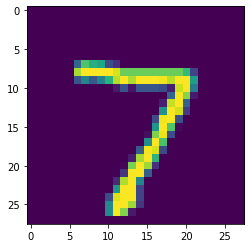

In [ ]:
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


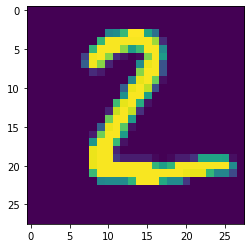

In [ ]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


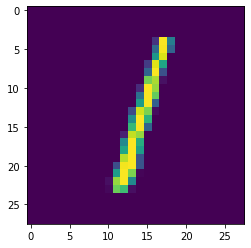

In [ ]:
print(plt.imshow(X_test[2]))

AxesImage(54,36;334.8x217.44)


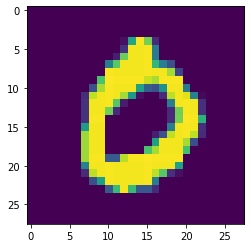

In [ ]:
print(plt.imshow(X_test[3]))

AxesImage(54,36;334.8x217.44)


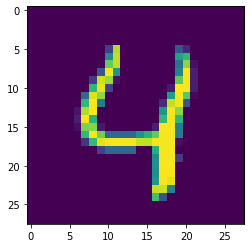

In [ ]:
print(plt.imshow(X_test[4]))